In [1]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from skimage import transform
from skimage import exposure
from skimage import io
from sklearn.utils import shuffle

np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
# Store data, labels in the list
cur_path = "traffic_dataset"
data = []
labels = []
num_classes = len(os.listdir(cur_path + "\Train"))
print(num_classes)

43


In [3]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

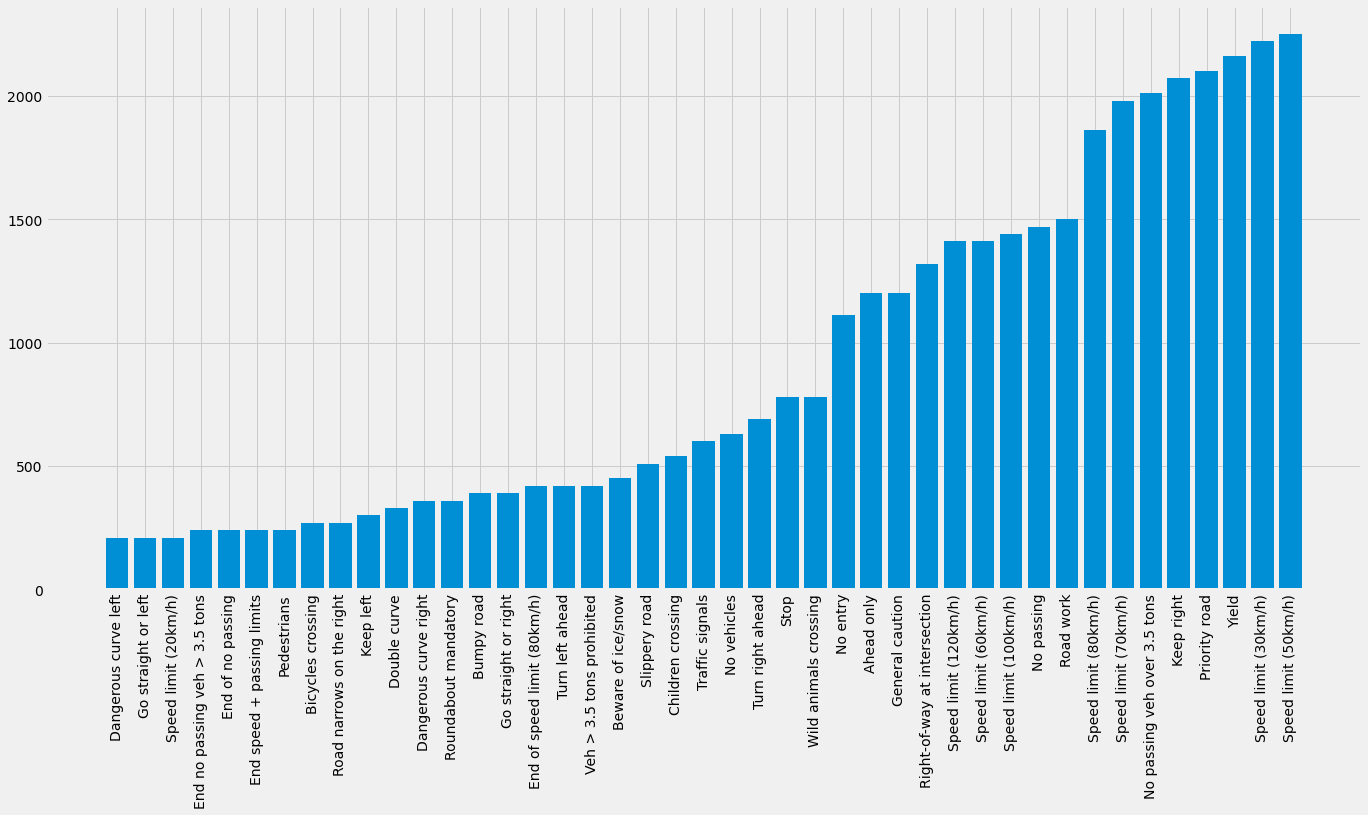

In [4]:
folders = os.listdir(cur_path + "\Train")

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(cur_path + "\Train" + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

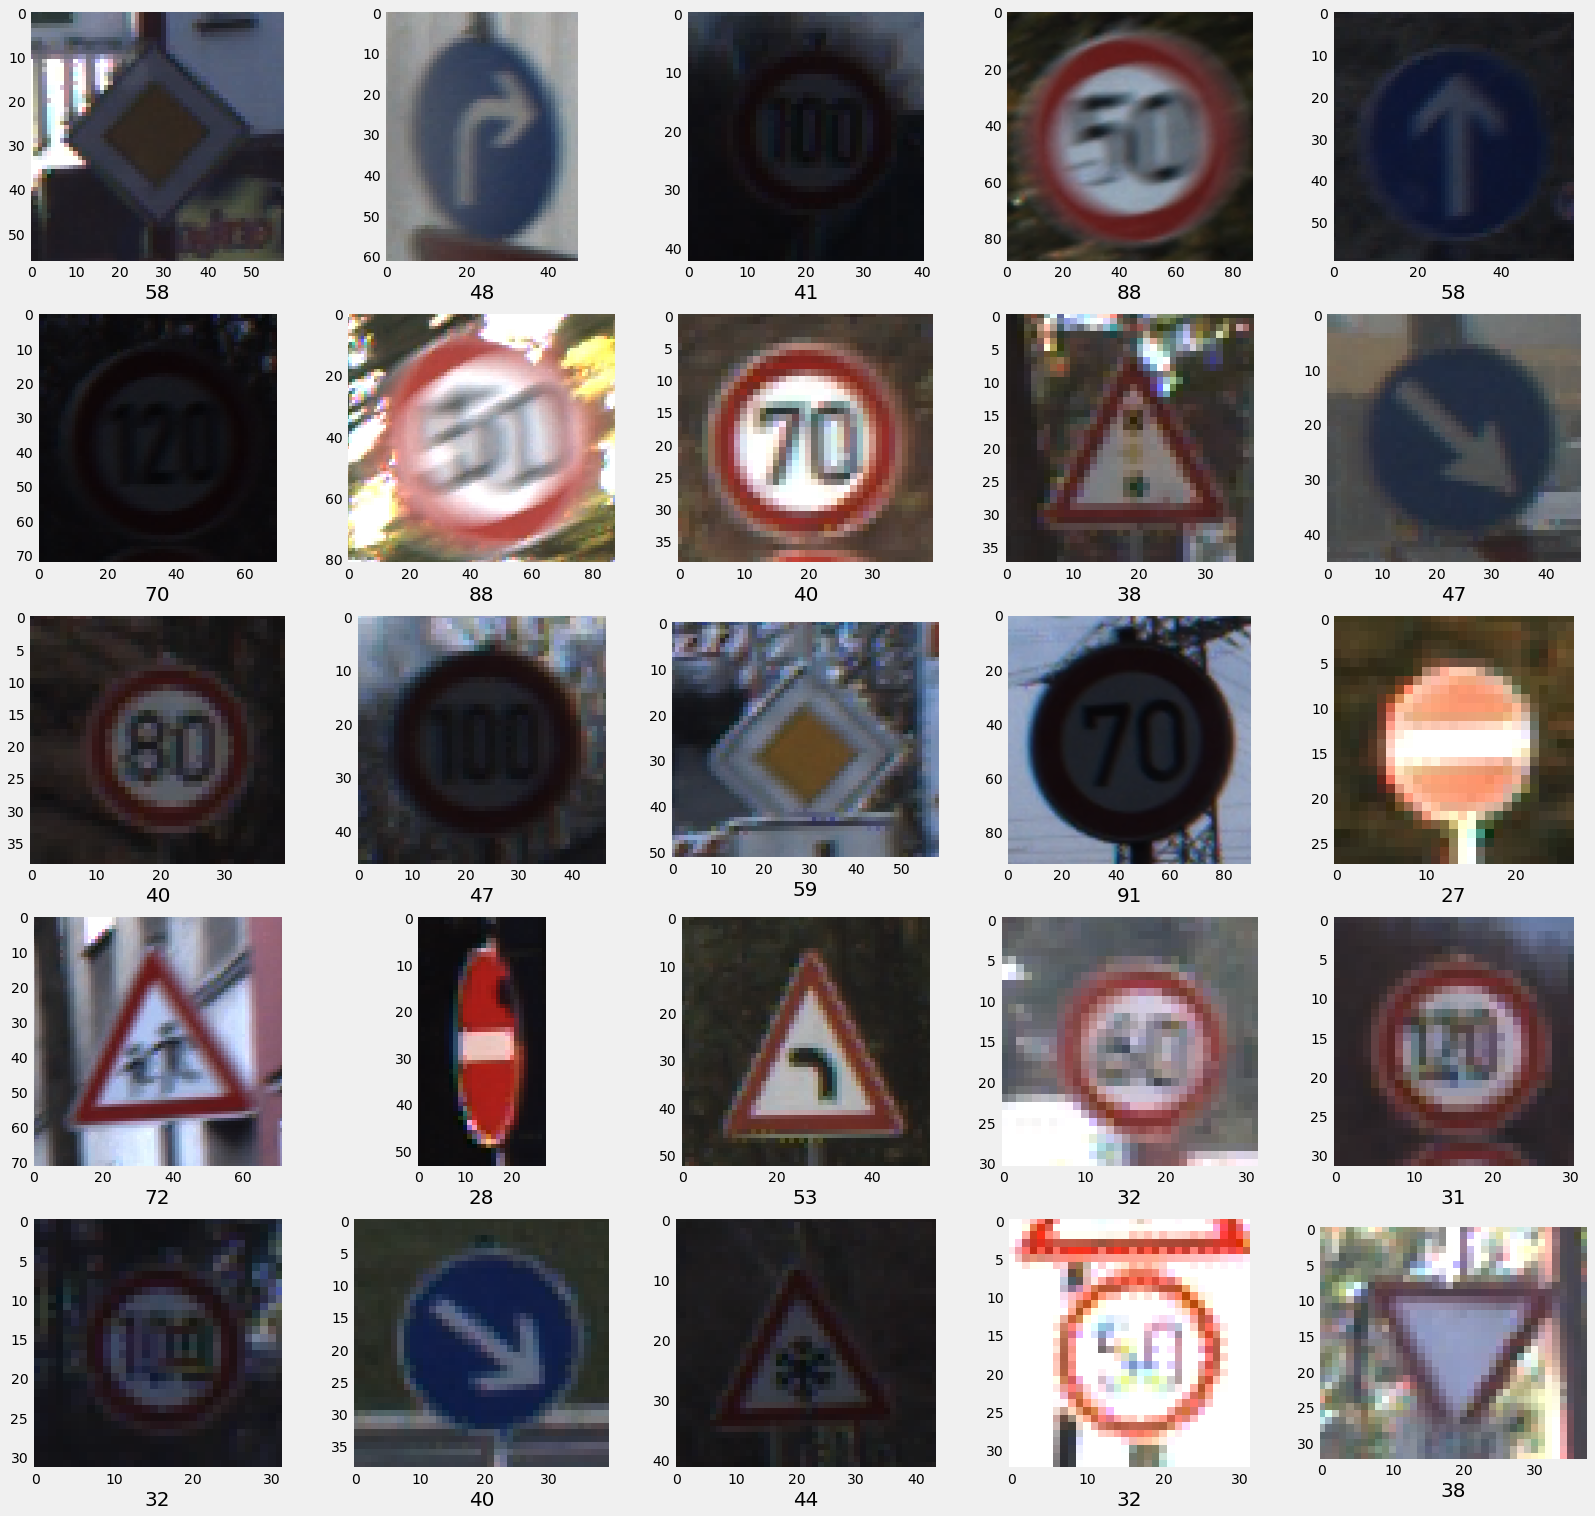

In [5]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(cur_path + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = cur_path + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
  

In [6]:
# Retrieving the images and their labels 
for i in range(num_classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
# Preprocess the images
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            

In [7]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 32, 32, 3) (39209,)


In [8]:
#Shuffling the training data
shuffle_indexes = np.arange(data.shape[0])
np.random.shuffle(shuffle_indexes)
data = data[shuffle_indexes]
labels = labels[shuffle_indexes]

In [9]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [10]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 6)         906       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        880       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2

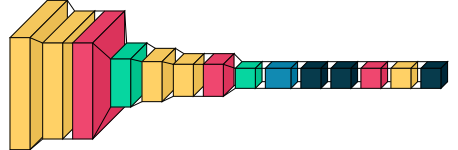

In [13]:
import visualkeras
visualkeras.layered_view(model)

In [14]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 21s 21ms/step - loss: 1.3565 - accuracy: 0.6491 - val_loss: 0.2535 - val_accuracy: 0.9360
Epoch 2/10
981/981 [==============================] - 18s 19ms/step - loss: 0.2681 - accuracy: 0.9282 - val_loss: 0.0980 - val_accuracy: 0.9745
Epoch 3/10
981/981 [==============================] - 20s 21ms/step - loss: 0.1377 - accuracy: 0.9637 - val_loss: 0.0823 - val_accuracy: 0.9768
Epoch 4/10
981/981 [==============================] - 19s 19ms/step - loss: 0.1014 - accuracy: 0.9725 - val_loss: 0.0784 - val_accuracy: 0.9762
Epoch 5/10
981/981 [==============================] - 19s 20ms/step - loss: 0.0767 - accuracy: 0.9789 - val_loss: 0.0485 - val_accuracy: 0.9864
Epoch 6/10
981/981 [==============================] - 20s 21ms/step - loss: 0.0588 - accuracy: 0.9834 - val_loss: 0.0396 - val_accuracy: 0.9879
Epoch 7/10
981/981 [==============================] - 21s 21ms/step - loss: 0.0515 - accuracy: 0.9852 - val_loss: 0.0370 - val_accuracy:

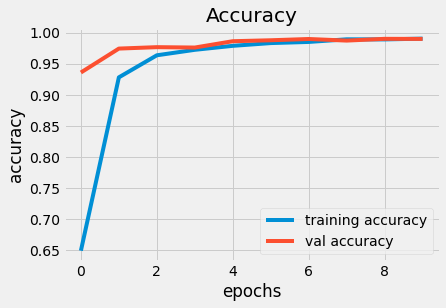

In [15]:
# Plotting graphs for Accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

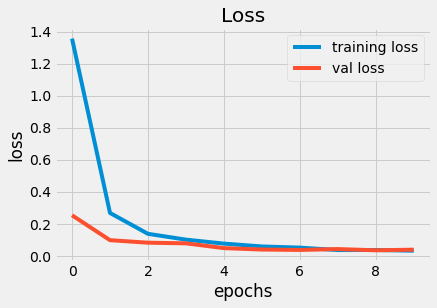

In [16]:
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# Testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv("traffic_dataset\Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [18]:
for img in imgs:
    image = Image.open(cur_path + '\\'+ img)
    image = image.resize((32,32))
    data.append(np.array(image))
    
X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

In [19]:
pred_str = pred.astype('str')
labels_str = labels.astype('str')

In [20]:
#Accuracy with the test data
print(accuracy_score(labels, pred))

0.9545526524148852


In [21]:
# Label Overview
class_names = [ "00: Speed limit (20km/h)",
            "01: Speed limit (30km/h)", 
            "02: Speed limit (50km/h)", 
            "03: Speed limit (60km/h)", 
            "04: Speed limit (70km/h)", 
            "05: Speed limit (80km/h)", 
            "06: End of speed limit (80km/h)", 
            "07: Speed limit (100km/h)", 
            "08: Speed limit (120km/h)", 
            "09: No passing", 
            "10: No passing veh over 3.5 tons", 
            "11: Right-of-way at intersection", 
            "12: Priority road", 
            "13: Yield", 
            "14: Stop", 
            "15: No vehicles", 
            "16: Veh > 3.5 tons prohibited", 
            "17: No entry", 
            "18: General caution", 
            "19: Dangerous curve left", 
            "20: Dangerous curve right", 
            "21: Double curve", 
            "22: Bumpy road", 
            "23: Slippery road", 
            "24: Road narrows on the right", 
            "25: Road work", 
            "26: Traffic signals", 
            "27: Pedestrians", 
            "28: Children crossing", 
            "29: icycles crossing", 
            "30: Beware of ice/snow",
            "31: Wild animals crossing", 
            "32: End speed + passing limits", 
            "33: Turn right ahead", 
            "34: Turn left ahead", 
            "35: Ahead only", 
            "36: Go straight or right", 
            "37: Go straight or left", 
            "38: Keep right", 
            "39: Keep left", 
            "40: Roundabout mandatory", 
            "41: End of no passing", 
            "42: End no passing veh > 3.5 tons" ]

In [22]:
print(labels_str.shape[0])

12630


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

for i in range(pred.shape[0]):
  pred_str[i] = class_names[pred[i]]
    
for i in range(labels.shape[0]):
  labels_str[i] = class_names[labels[i]]


In [24]:
print('Confusuion Matrix')
print(confusion_matrix(labels_str, pred_str))

Confusuion Matrix
[[ 51   5   0 ...   0   0   0]
 [  0 704   5 ...   0   0   0]
 [  0   7 739 ...   0   0   0]
 ...
 [  0   0   2 ...  74   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   4  68]]


In [25]:
print('Classification Report')
print(classification_report(labels_str, pred_str,target_names=class_names))

Classification Report
                                   precision    recall  f1-score   support

         00: Speed limit (20km/h)       0.94      0.85      0.89        60
         01: Speed limit (30km/h)       0.96      0.98      0.97       720
         02: Speed limit (50km/h)       0.94      0.99      0.96       750
         03: Speed limit (60km/h)       0.97      0.96      0.96       450
         04: Speed limit (70km/h)       0.96      0.97      0.97       660
         05: Speed limit (80km/h)       0.93      0.92      0.92       630
  06: End of speed limit (80km/h)       0.99      0.85      0.91       150
        07: Speed limit (100km/h)       0.98      0.93      0.95       450
        08: Speed limit (120km/h)       0.97      0.96      0.96       450
                   09: No passing       0.99      0.99      0.99       480
 10: No passing veh over 3.5 tons       0.97      0.98      0.98       660
 11: Right-of-way at intersection       0.94      0.92      0.93       420
  

In [26]:
model.save('traffic_classifier_main_model.h5')